Shape of Phi: (23, 2)
Lambda:
['8.729378283512018+0.0j', '0.0+0.0j']
['0.0+0.0j', '2.700655533244824+0.0j']
Shape of X[:, 1:]: (23, 2)


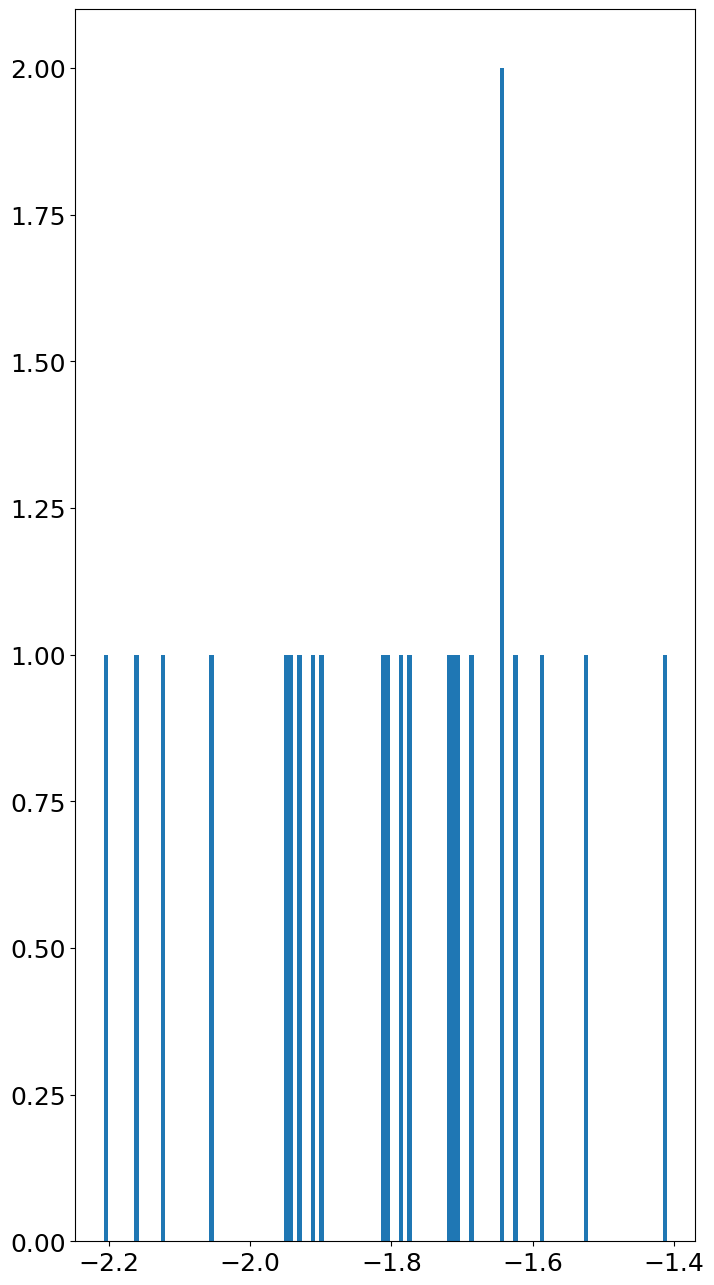

In [2]:
#Karolina Baron
#Wariant 15 - Matematyka konkretna

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [8, 16]

def DMD(X, Xprime, r):
    U, Sigma, VT = np.linalg.svd(X, full_matrices=0)  # Step 1
    Ur = U[:, :r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r, :]
    Atilde = np.linalg.solve(Sigmar.T, (Ur.T @ Xprime @ VTr.T).T).T  # Step 2
    Lambda, W = np.linalg.eig(Atilde)  # Step 3
    Lambda = np.diag(Lambda)
    Phi = Xprime @ np.linalg.solve(Sigmar.T, VTr).T @ W  # Step 4
    alpha1 = Sigmar @ VTr[:, 0]
    b = np.linalg.solve(W @ Lambda, alpha1)
    return Phi, Lambda, b

# Load matrices from CSV files
X = pd.read_csv('War15_X.csv', header=None, sep=';').select_dtypes(include=[np.number]).to_numpy()
Xprime = pd.read_csv('War15_Xprime.csv', header=None, sep=';').select_dtypes(include=[np.number]).to_numpy()

# Call the DMD function with your matrices
Phi, Lambda, b = DMD(X[:, :-1], X[:, 1:], 21)

# Debugging print statements
print("Shape of Phi:", Phi.shape)
print("Lambda:")
for row in Lambda:
    print([f"{entry.real}+{entry.imag}j" for entry in row])
print("Shape of X[:, 1:]:", X[:, 1:].shape)

# Modify the reshape operation based on the actual structure of Phi
V2 = np.real(Phi[:, 0][:199])

# Plot the histogram
plt.hist(V2.reshape(-1), 128)
plt.show()